> **Problem overview**

Long ago, in the distant, fragrant mists of time, there was a competition...

It was not just any competition.

It was a competition that challenged mere mortals to model a 20,000x200 matrix of continuous variables using only 250 training samples... without overfitting.

Data scientists ― including Kaggle's very own Will Cukierski ― competed by the hundreds. Legends were made. (Will took 5th place, and eventually ended up working at Kaggle!) People overfit like crazy. It was a Kaggle-y, data science-y madhouse.

So... we're doing it again.

This is the next logical step in the evolution of weird competitions. Once again we have 20,000 rows of continuous variables, and a mere handful of training samples. Once again, we challenge you not to overfit. Do your best, model without overfitting, and add, perhaps, to your own legend.

In addition to bragging rights, the winner also gets swag. Enjoy!

In [1]:
# import data manipulation library
import numpy as np
import pandas as pd

# import data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn model class
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import sklearn model selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# import sklearn model evaluation classification metrics
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, fbeta_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve

> **Acquiring training and testing data**

We start by acquiring the training and testing datasets into Pandas DataFrames.

In [2]:
# acquiring training and testing data
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [3]:
# visualize head of the training data
df_train.head(n=5)

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,-0.912,-0.107,0.305,0.102,0.826,0.417,0.177,-0.673,-0.503,1.864,0.410,-1.927,0.102,-0.931,1.763,1.449,-1.097,-0.686,-0.250,-1.859,1.125,1.009,-2.296,0.385,-0.876,1.528,-0.144,-1.078,...,-0.681,1.250,-0.565,-1.318,-0.923,0.075,-0.704,2.457,0.771,-0.460,0.569,-1.320,-1.516,-2.145,-1.120,0.156,0.820,-1.049,-1.125,0.484,0.617,1.253,1.248,0.504,-0.802,-0.896,-1.793,-0.284,-0.601,0.569,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,2.907,1.085,2.144,1.540,0.584,1.133,1.098,-0.237,-0.498,0.283,-1.100,-0.417,1.382,-0.515,-1.519,0.619,-0.128,0.866,-0.540,1.238,-0.227,0.269,-0.390,-2.721,1.659,0.106,-0.121,1.719,...,0.971,-1.489,0.530,0.917,-0.094,-1.407,0.887,-0.104,-0.583,1.267,-1.667,-2.771,-0.516,1.312,0.491,0.932,2.064,0.422,1.215,2.012,0.043,-0.307,-0.059,1.121,1.333,0.211,1.753,0.053,1.274,-0.612,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,0.183,0.459,0.478,-0.425,0.352,1.095,0.300,-1.044,0.270,-1.038,0.144,-1.658,-0.946,0.633,-0.772,1.786,0.136,-0.103,-1.223,2.273,0.055,-2.032,-0.452,0.064,0.924,-0.692,-0.067,-0.917,1.896,...,-0.540,-0.299,1.074,-0.748,1.086,-0.766,-0.931,0.432,1.345,-0.491,-1.602,-0.727,0.346,0.780,-0.527,-1.122,-0.208,-0.730,-0.302,2.535,-1.045,0.037,0.020,1.373,0.456,-0.277,1.381,1.843,0.749,0.202,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,0.274,0.335,-1.148,0.067,-1.010,1.048,-1.442,0.210,0.836,-0.326,0.716,-0.764,0.248,-1.308,2.127,0.365,0.296,-0.808,1.854,0.118,0.380,0.999,-1.171,2.798,0.394,-1.048,1.078,0.401,-0.486,...,-0.083,-0.831,1.251,-0.206,-0.933,-1.215,0.281,0.512,-0.424,0.769,0.223,-0.710,2.725,0.176,0.845,-1.226,1.527,-1.701,0.597,0.150,1.864,0.322,-0.214,1.282,0.408,-0.910,1.020,-0.299,-1.574,-1.618,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,2.198,0.190,0.453,0.494,1.478,-1.412,0.270,-1.312,-0.322,-0.688,-0.198,-0.285,1.042,-0.315,-0.478,0.024,-0.190,1.656,-0.469,-1.437,-0.581,-0.308,-0.837,-1.739,0.037,0.336,-1.102,2.371,0.554,...,-1.050,-0.347,0.904,-1.324,-0.849,3.432,0.222,0.416,0.174,-1.517,-0.337,0.055,-0.464,0.014,-1.073,0.325,-0.523,-0.692,0.190,-0.883,-1.830,1.408,2.319,1.704,-0.723,1.014,0.064,0.096,-0.775,1.845,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [4]:
# visualize tail of the testing data
df_test.tail(n=5)

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
19745,19995,1.069,0.517,-0.690,0.241,0.913,-0.859,0.093,-0.359,-0.047,0.713,2.191,0.774,-0.110,-0.721,0.375,0.577,-0.192,-1.345,0.042,0.786,0.774,2.458,0.634,-0.664,-0.486,0.136,-0.506,0.509,-2.206,-1.035,-0.828,0.335,-0.963,0.946,1.728,0.256,-0.938,0.041,-0.112,...,-0.079,-0.853,0.708,0.301,0.636,-0.688,0.220,-1.192,1.257,-0.664,-1.258,-1.199,-0.145,0.581,-0.613,2.775,-0.254,-0.027,-1.088,-0.461,-0.356,-0.622,-0.228,-0.490,1.011,0.655,1.088,-0.796,-0.261,-1.219,0.495,1.021,0.126,-0.353,-0.092,0.996,-0.381,-0.748,1.567,1.165
19746,19996,-0.529,0.438,0.672,1.436,-0.720,0.698,-0.350,2.150,-1.241,-0.167,-0.188,0.541,-0.392,1.727,-0.965,0.550,-2.164,-0.523,-0.144,-0.931,0.703,0.464,-0.919,-0.867,-1.345,-0.634,0.121,0.877,-1.665,-0.086,-0.703,-0.874,0.676,1.671,0.356,0.365,-1.177,1.380,1.987,...,-1.008,0.832,-0.184,-1.369,0.555,-1.820,-0.838,-1.635,0.102,-0.548,-0.914,0.163,0.430,1.546,-0.082,0.200,-2.344,-1.380,0.591,0.905,-0.932,-1.391,-0.950,0.728,0.455,0.047,-1.662,1.572,0.380,-0.366,-0.246,-0.205,-0.368,1.589,0.389,-0.496,-0.940,-1.457,-1.152,0.937
19747,19997,-0.554,-0.936,-1.427,0.027,-0.539,0.994,-1.832,-1.156,0.474,1.483,1.524,0.143,-0.607,-1.142,2.786,-0.387,-0.484,-0.778,1.031,1.355,0.828,-0.665,0.031,-0.254,-0.281,-1.545,0.300,0.908,-0.871,-0.345,-0.448,-0.179,0.035,-0.773,0.481,-2.736,-1.220,-2.047,0.011,...,-0.830,-1.999,0.720,0.869,0.019,0.457,2.047,-0.616,-0.678,-0.287,-0.645,0.354,1.346,1.026,-0.902,0.174,0.290,-0.005,-2.509,0.427,0.760,-1.416,0.144,1.472,-0.492,0.229,1.224,0.600,-1.543,0.140,-0.008,-1.283,-0.574,0.465,-0.663,0.486,-0.375,1.546,0.759,0.519
19748,19998,-0.746,1.205,0.750,-0.236,1.139,-1.727,-0.677,-1.254,-0.099,-0.724,0.014,-0.575,-0.142,1.171,-0.198,0.336,-0.155,0.280,1.506,-0.947,0.493,0.235,-1.187,0.063,1.469,0.998,-0.044,1.942,-0.167,0.566,0.643,1.005,-0.185,0.314,-1.207,0.672,-0.338,-0.848,-0.001,...,-0.866,-0.355,-1.453,-0.301,-1.129,-0.316,-0.172,0.272,0.381,-0.125,1.929,0.800,-0.632,-0.041,0.294,1.330,1.094,0.400,1.025,-0.289,0.101,-0.586,-0.103,0.915,-0.602,1.751,1.785,-1.300,-0.391,1.837,-0.228,-0.814,1.008,-0.152,-1.831,-0.980,-1.054,1.319,-0.181,0.689
19749,19999,0.736,-0.216,-0.110,-1.404,-0.265,-1.770,0.715,0.469,1.077,0.333,-0.994,-0.331,1.009,0.607,-1.729,1.478,1.520,-1.282,-1.858,0.451,1.065,-1.493,-0.057,0.244,0.968,0.907,0.748,-0.191,0.236,-0.444,0.110,-0.173,-0.732,0.135,0.179,-0.221,-1.340,0.538,0.368,...,0.166,-0.251,-0.943,-0.698,-0.513,1.056,-0.366,-1.997,-0.438,-2.207,-0.801,0.273,0.402,-1.044,1.231,1.685,0.277,-1.378,-0.082,0.052,-1.102,0.215,1.488,0.832,0.482,-0.120,0.317,0.885,1.043,-0.320,-1.201,-1.633,0.448,-0.511,-0.516,1.565,0.318,-0.268,0.133,0.826


In [5]:
# combine training and testing dataframe
df_train['datatype'], df_test['datatype'] = 'training', 'testing'
df_test.insert(1, 'target', np.nan)
df_data = pd.concat([df_train, df_test], ignore_index=True)

> **Feature exploration, engineering and cleansing**

Here we generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution together with exploring some data.

In [6]:
# countplot function plot - categorical variable (x-axis) vs. categorical variable (y-axis)
def countplot(x = None, y = None, data = None, ncols = 5, nrows = 3):
    fig, axes = plt.subplots(figsize=(4*ncols , 3*nrows), ncols=ncols, nrows=nrows)
    axes = axes.flatten()
    for i, v in enumerate(x): sns.countplot(x=v, hue=y, data=data, ax=axes[i])

In [7]:
# boxplot function plot - categorical variable (x-axis) vs. numerical variable (y-axis)
def boxplot(cat = None, num = None, data = None, ncols = 5, nrows = 3):
    fig, axes = plt.subplots(figsize=(4*ncols , 3*nrows), ncols=ncols, nrows=nrows)
    axes = axes.flatten()
    if type(cat) == list:
        for i, v in enumerate(cat): sns.boxplot(x=v, y=num, data=data, ax=axes[i])
    else:
        for i, v in enumerate(num): sns.boxplot(x=cat, y=v, data=data, ax=axes[i])

In [8]:
# swarmplot function plot - categorical variable (x-axis) vs. numerical variable (y-axis)
def swarmplot(cat = None, num = None, data = None, ncols = 5, nrows = 3):
    fig, axes = plt.subplots(figsize=(4*ncols , 3*nrows), ncols=ncols, nrows=nrows)
    axes = axes.flatten()
    if type(cat) == list:
        for i, v in enumerate(cat): sns.swarmplot(x=v, y=num, data=data, ax=axes[i])
    else:
        for i, v in enumerate(num): sns.swarmplot(x=cat, y=v, data=data, ax=axes[i])

In [9]:
# violinplot function plot - categorical variable (x-axis) vs. numerical variable (y-axis)
def violinplot(cat = None, num = None, data = None, ncols = 5, nrows = 3):
    fig, axes = plt.subplots(figsize=(4*ncols , 3*nrows), ncols=ncols, nrows=nrows)
    axes = axes.flatten()
    if type(cat) == list:
        for i, v in enumerate(cat): sns.violinplot(x=v, y=num, data=data, ax=axes[i])
    else:
        for i, v in enumerate(num): sns.violinplot(x=cat, y=v, data=data, ax=axes[i])

In [10]:
# scatterplot function plot - numerical variable (x-axis) vs. numerical variable (y-axis)
def scatterplot(x = None, y = None, data = None, ncols = 5, nrows = 3):
    fig, axes = plt.subplots(figsize=(4*ncols , 3*nrows), ncols=ncols, nrows=nrows)
    axes = axes.flatten()
    for i, xi in enumerate(x): sns.scatterplot(x=xi, y=y, data=data, ax=axes[i])

In [11]:
# describe training and testing data
df_data.describe(include='all')

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,datatype
count,20000.000000,250.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,testing
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19750
mean,9999.500000,0.640000,-0.013577,0.000624,0.007173,-0.003457,0.003371,0.002612,0.004561,-0.009505,-0.003633,-0.002260,-0.003283,0.008696,0.001032,-0.000257,0.000232,0.010980,-0.002827,0.005510,0.000284,-0.001324,0.003231,-0.018591,0.007186,-0.007013,0.001538,-0.005322,0.005611,-0.002389,0.013475,0.003615,0.005253,0.008203,-0.002878,-0.004160,0.007572,-0.012942,0.009543,0.008625,...,-0.005610,0.000512,-0.006452,0.000492,-0.011011,0.003302,0.007258,0.008906,-0.002685,-0.010016,0.004604,0.004170,0.000658,0.011935,-0.001876,0.001092,-0.006310,0.004621,-0.002184,-0.007981,0.015162,-0.000417,-0.001086,0.008444,0.00060,-0.005488,-0.003777,0.003065,-0.003577,0.003103,-0.008424,-0.003681,0.012482,0.008129,0.006091,-0.003649,-0.001107,0.013030,-0.001543,NaN
std,5773.647028,0.480963,1.003695,0.994128,1.001209,1.008560,1.003213,1.002318,0.994450,0.997292,0.996512,1.000911,1.007046,0.998538,1.003437,0.998996,1.003540,0.998969,1.005439,1.000977,1.002912,1.001973,0.996941,0.993468,0.997645,1.003119,1.005859,0.997124,1.000030,0.996091,1.009503,1.005246,0.996006,0.998483,1.006877,0.995439,1.000947,0.996020,0.995416,1.005538,...,1.001689,1.002865,0.999412,1.001723,0.999216,1.002363,0.998055,1.011286,1.000661,1.002192,0.996265,1.011648,0.994479,1.014349,1.001492,1.002056,1.003826,0.999478,1.003903,1.004367,0.998708,1.000186,1.007264,0.995308,0.99214,0.996199,0.999231,1.005991,0.989888,0.996490,0.996307,0.999212,1.013846,0.994824,1.000107,0.995909,1.003622,0.996408,1.000313,NaN
min,0.000000,0.000000,-4.070000,-3.664000,-4.258000,-4.140000,-4.411000,-3.586000,-3.953000,-3.906000,-4.203000,-4.024000,-3.794000,-4.284000,-3.830000,-4.551000,-3.649000,-3.669000,-4.161000,-3.984

In [12]:
# convert dtypes numeric to object
col_convert = ['target']
df_data[col_convert] = df_data[col_convert].astype('object')

In [13]:
# list all features type number
col_number = df_data.select_dtypes(include=['number']).columns.tolist()
print('features type number:\n items %s\n length %d' %(col_number, len(col_number)))

# list all features type object
col_object = df_data.select_dtypes(include=['object']).columns.tolist()
print('features type object:\n items %s\n length %d' %(col_object, len(col_object)))

features type number:
 items ['id', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '15

In [14]:
# feature exploration: histogram of all numeric features
_ = df_data.hist(bins=20, figsize=(200, 150))

After extracting all features, it is required to convert category features to numerics features, a format suitable to feed into our Machine Learning models.

In [15]:
# feature extraction: target
df_data['target'] = df_data['target'].fillna(-1)

In [16]:

# convert category codes for data dataframe
df_data = pd.get_dummies(df_data, columns=['datatype'], drop_first=True)

In [17]:
# convert dtypes object to numeric for data dataframe
col_convert = ['target']
df_data[col_convert] = df_data[col_convert].astype(int)

In [18]:
# describe data dataframe
df_data.describe(include='all')

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,datatype_training
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,9999.500000,-0.979500,-0.013577,0.000624,0.007173,-0.003457,0.003371,0.002612,0.004561,-0.009505,-0.003633,-0.002260,-0.003283,0.008696,0.001032,-0.000257,0.000232,0.010980,-0.002827,0.005510,0.000284,-0.001324,0.003231,-0.018591,0.007186,-0.007013,0.001538,-0.005322,0.005611,-0.002389,0.013475,0.003615,0.005253,0.008203,-0.002878,-0.004160,0.007572,-0.012942,0.009543,0.008625,...,-0.005610,0.000512,-0.006452,0.000492,-0.011011,0.003302,0.007258,0.008906,-0.002685,-0.010016,0.004604,0.004170,0.000658,0.011935,-0.001876,0.001092,-0.006310,0.004621,-0.002184,-0.007981,0.015162,-0.000417,-0.001086,0.008444,0.00060,-0.005488,-0.003777,0.003065,-0.003577,0.003103,-0.008424,-0.003681,0.012482,0.008129,0.006091,-0.003649,-0.001107,0.013030,-0.001543,0.012500
std,5773.647028,0.189951,1.003695,0.994128,1.001209,1.008560,1.003213,1.002318,0.994450,0.997292,0.996512,1.000911,1.007046,0.998538,1.003437,0.998996,1.003540,0.998969,1.005439,1.000977,1.002912,1.001973,0.996941,0.993468,0.997645,1.003119,1.005859,0.997124,1.000030,0.996091,1.009503,1.005246,0.996006,0.998483,1.006877,0.995439,1.000947,0.996020,0.995416,1.005538,...,1.001689,1.002865,0.999412,1.001723,0.999216,1.002363,0.998055,1.011286,1.000661,1.002192,0.996265,1.011648,0.994479,1.014349,1.001492,1.002056,1.003826,0.999478,1.003903,1.004367,0.998708,1.000186,1.007264,0.995308,0.99214,0.996199,0.999231,1.005991,0.989888,0.996490,0.996307,0.999212,1.013846,0.994824,1.000107,0.995909,1.003622,0.996408,1.000313,0.111105
min,0.000000,-1.000000,-4.070000,-3.664000,-4.258000,-4.140000,-4.411000,-3.586000,-3.953000,-3.906000,-4.203000,-4.024000,-3.794000,-4.284000,-3.830000,-4.551000,-3.649000,-3.669000,-4.161000,-3.984000,-4.599000,-3.896000,-3.655000,-4.146000,-4.257000,-3.914000,-4.032000,-3.990000,-4.532000,-3.768000,-3.625000,-4.212000,-3.810000,-4.358000,-3.674000,-4.311000,-3.834000,-3.691000,-3.696000,-3.645000,...,-4.878000,-3.805000,-4.194000,-3.757000,-3.738000,-3.828000,-3.747000,-4.460000,-4.303000,-3.846000,-3.857000,-3.968000,-3.592000,-4.128000,-3.562000,-3.952000,-4.585000,-3.849000,-4.036000,-3.785000,-4.031000,-4.016000,-4.062000,-4.320000,-3.94600,-3.931000,-3.846000,-4.608000,-3.832000,-3.688000,-3.877000,-3.599000,-3.650000,-3.865000,-3.814000,-3.835000,-3.908000,-3.581000,-4.135000,0.000000
25%,4999.750000,-1.000000,-0.688250,-0.668000,-0.666000,-0.686000,-0.671000,-0.678250,-0.673000,-0.679000,-0.667000,-0.676250,-0.691000,-0.668000,-0.681250,-0.668000,-0.682000,-0.662000,-0.682250,-0.665000,-0.678000,-0.673000,-0.672250,-0.692000,-0.665000,-0.690000,-0.682000,-0.685000,-0.663000,-0.670000,-0.670000,-0.682000,-0.676000,-0.666000,-0.691000,

In [19]:
# verify dtypes object
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 303 entries, id to datatype_training
dtypes: float64(300), int64(2), uint8(1)
memory usage: 46.1 MB


> **Analyze and identify patterns by visualizations**

Let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will utilize the Seaborn plotting package which allows us to plot very conveniently as follows.

The Pearson Correlation plot can tell us the correlation between features with one another. If there is no strongly correlated between features, this means that there isn't much redundant or superfluous data in our training data. This plot is also useful to determine which features are correlated to the observed value.

The pairplots is also useful to observe the distribution of the training data from one feature to the other.

The pivot table is also another useful method to observe the impact between features.

> **Model, predict and solve the problem**

Now, it is time to feed the features to Machine Learning models.

In [20]:
# select all features to evaluate the feature importances
x = df_data[df_data['datatype_training'] == 1].drop(['id', 'target', 'datatype_training'], axis=1)
y = df_data.loc[df_data['datatype_training'] == 1, 'target']

In [21]:
# set up random forest classifier to find the feature importances
forestclf = RandomForestClassifier(n_estimators=100, random_state=58).fit(x, y)
feat = pd.DataFrame(data=forestclf.feature_importances_, index=x.columns, columns=['feature_importances']).sort_values(['feature_importances'], ascending=False)

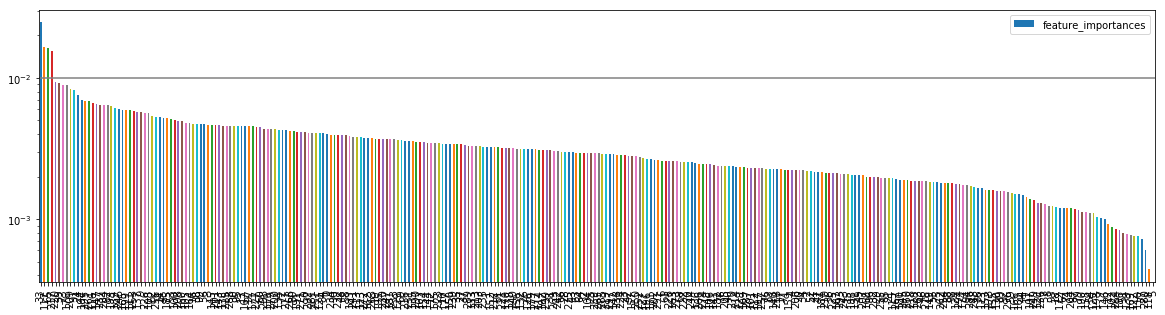

In [22]:
# plot the feature importances
feat.plot(y='feature_importances', figsize=(20, 5), kind='bar', logy=True)
plt.axhline(0.01, color="grey")

In [23]:
# list feature importances
model_feat = feat[feat['feature_importances'] > 0.01].index

More feature extraction by applying power and interaction term to feature importances.

In [24]:
# feature extraction: interaction 2
for col_feat_1 in model_feat:
    for col_feat_2 in model_feat:
        if col_feat_1 != col_feat_2:
            df_data[col_feat_1 + '_' + col_feat_2] = np.sqrt(df_data[col_feat_1] * df_data[col_feat_2]).fillna(0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


In [25]:
# select all features to evaluate the feature importances
x = df_data[df_data['datatype_training'] == 1].drop(['id', 'target', 'datatype_training'], axis=1)
y = df_data.loc[df_data['datatype_training'] == 1, 'target']

In [26]:
# set up random forest classifier to find the feature importances
forestclf = RandomForestClassifier(n_estimators=100, random_state=58).fit(x, y)
feat = pd.DataFrame(data=forestclf.feature_importances_, index=x.columns, columns=['feature_importances']).sort_values(['feature_importances'], ascending=False)

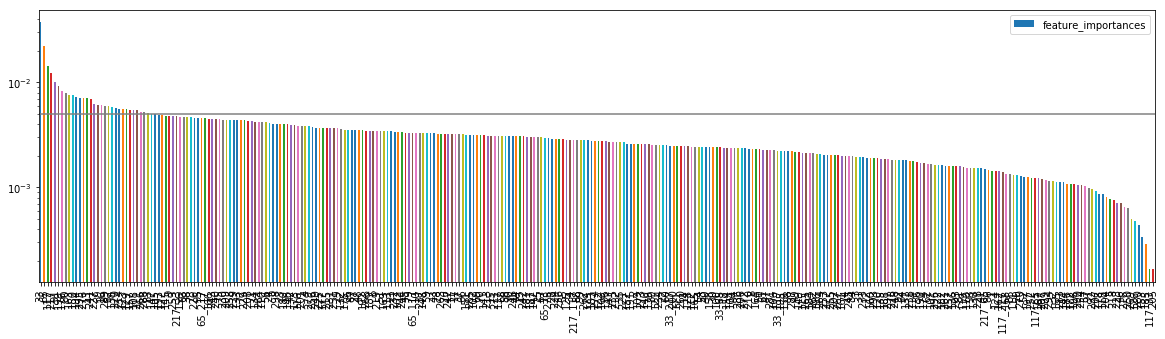

In [27]:
# plot the feature importances
feat.plot(y='feature_importances', figsize=(20, 5), kind='bar', logy=True)
plt.axhline(0.005, color="grey")

In [28]:
# list feature importances
model_feat = feat[feat['feature_importances'] > 0.005].index

In [29]:
# select the important features
x = df_data.loc[df_data['datatype_training'] == 1, model_feat]
y = df_data.loc[df_data['datatype_training'] == 1, 'target']

In [30]:
# perform train-test (validate) split
x_train, x_validate, y_train, y_validate = train_test_split(x, y, random_state=58, test_size=0.25)

In [31]:
# logistic regression model setup
model_logreg = LogisticRegression(solver='lbfgs')

# logistic regression model fit
model_logreg.fit(x_train, y_train)

# logistic regression model prediction
model_logreg_ypredict = model_logreg.predict(x_validate)

# logistic regression model metrics
model_logreg_f1score = f1_score(y_validate, model_logreg_ypredict)
model_logreg_accuracyscore = accuracy_score(y_validate, model_logreg_ypredict)
model_logreg_rocaucscore = roc_auc_score(y_validate, model_logreg_ypredict)
model_logreg_cvscores = cross_val_score(model_logreg, x, y, cv=20, scoring='roc_auc')
print('logistic regression\n  f1 score: %0.4f, accuracy score: %0.4f, roc auc score: %0.4f, cross validation score: %0.4f (+/- %0.4f)' %(model_logreg_f1score, model_logreg_accuracyscore, model_logreg_rocaucscore, model_logreg_cvscores.mean(), 2 * model_logreg_cvscores.std()))

logistic regression
  f1 score: 0.7901, accuracy score: 0.7302, roc auc score: 0.7120, cross validation score: 0.8769 (+/- 0.2156)


In [32]:
# decision tree classifier model setup
model_treeclf = DecisionTreeClassifier(splitter='best', min_samples_split=5)

# decision tree classifier model fit
model_treeclf.fit(x_train, y_train)

# decision tree classifier model prediction
model_treeclf_ypredict = model_treeclf.predict(x_validate)

# decision tree classifier model metrics
model_treeclf_f1score = f1_score(y_validate, model_treeclf_ypredict)
model_treeclf_accuracyscore = accuracy_score(y_validate, model_treeclf_ypredict)
model_treeclf_rocaucscore = roc_auc_score(y_validate, model_treeclf_ypredict)
model_treeclf_cvscores = cross_val_score(model_treeclf, x, y, cv=20, scoring='roc_auc')
print('decision tree classifier\n  f1 score: %0.4f, accuracy score: %0.4f, roc auc score: %0.4f, cross validation score: %0.4f (+/- %0.4f)' %(model_treeclf_f1score, model_treeclf_accuracyscore, model_treeclf_rocaucscore, model_treeclf_cvscores.mean(), 2 * model_treeclf_cvscores.std()))

decision tree classifier
  f1 score: 0.6667, accuracy score: 0.5873, roc auc score: 0.5720, cross validation score: 0.6580 (+/- 0.2715)


In [33]:
# random forest classifier model setup
model_forestclf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=58)

# random forest classifier model fit
model_forestclf.fit(x_train, y_train)

# random forest classifier model prediction
model_forestclf_ypredict = model_forestclf.predict(x_validate)

# random forest classifier model metrics
model_forestclf_f1score = f1_score(y_validate, model_forestclf_ypredict)
model_forestclf_accuracyscore = accuracy_score(y_validate, model_forestclf_ypredict)
model_forestclf_rocaucscore = roc_auc_score(y_validate, model_forestclf_ypredict)
model_forestclf_cvscores = cross_val_score(model_forestclf, x, y, cv=20, scoring='roc_auc')
print('random forest classifier\n  f1 score: %0.4f, accuracy score: %0.4f, roc auc score: %0.4f, cross validation score: %0.4f (+/- %0.4f)' %(model_forestclf_f1score, model_forestclf_accuracyscore, model_forestclf_rocaucscore, model_forestclf_cvscores.mean(), 2 * model_forestclf_cvscores.std()))

random forest classifier
  f1 score: 0.7253, accuracy score: 0.6032, roc auc score: 0.5715, cross validation score: 0.8334 (+/- 0.1724)


> **Supply or submit the results**

Our submission to the competition site Kaggle is ready. Any suggestions to improve our score are welcome.

In [34]:
# model selection
final_model = model_logreg

# prepare testing data and compute the observed value
x_test = df_data.loc[df_data['datatype_training'] == 0, model_feat]
y_test = pd.DataFrame(final_model.predict(x_test),
                      columns=['target'], index=df_data.loc[df_data['datatype_training'] == 0, 'id'])

In [35]:
# summit the results
out = pd.DataFrame({'id': y_test.index, 'target': y_test['target']})
out.to_csv('submission.csv', index=False)